Step 1: Setup **Environment**

In [1]:
# Import TensorFlow and check version
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# Import other libraries
import numpy as np
import matplotlib.pyplot as plt


TensorFlow version: 2.18.0


Step 2: Load and Explore MNIST **Dataset**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


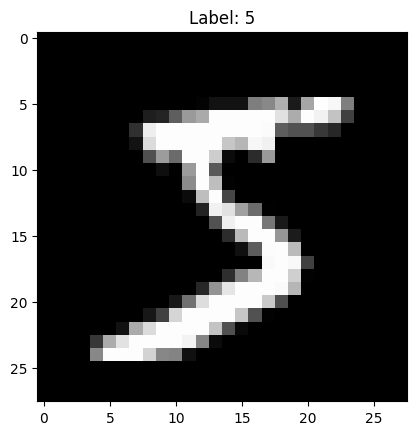

In [2]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist

# Split into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print shapes
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# Display an example image
plt.imshow(x_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.show()


Step 3: Preprocess the Data

In [3]:
# Normalize pixel values to range [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to add channel dimension (needed for CNN)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Print new shape
print("New training data shape:", x_train.shape)
print("New test data shape:", x_test.shape)


New training data shape: (60000, 28, 28, 1)
New test data shape: (10000, 28, 28, 1)


Step 4:Build the CNN **Model**

In [4]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0–9
])

# Show model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Step 5: Compile and Train the **Model**


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.9031 - loss: 0.3151 - val_accuracy: 0.9846 - val_loss: 0.0464
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9854 - loss: 0.0482 - val_accuracy: 0.9885 - val_loss: 0.0368
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9911 - loss: 0.0303 - val_accuracy: 0.9904 - val_loss: 0.0345
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9929 - loss: 0.0225 - val_accuracy: 0.9910 - val_loss: 0.0306
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9948 - loss: 0.0170 - val_accuracy: 0.9893 - val_loss: 0.0378


Step 6: Visualize Training Results

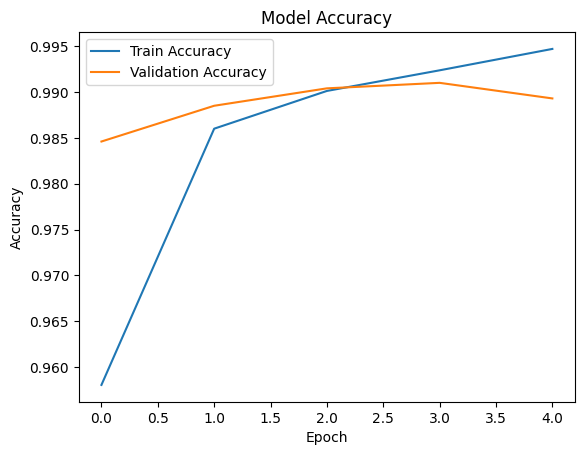

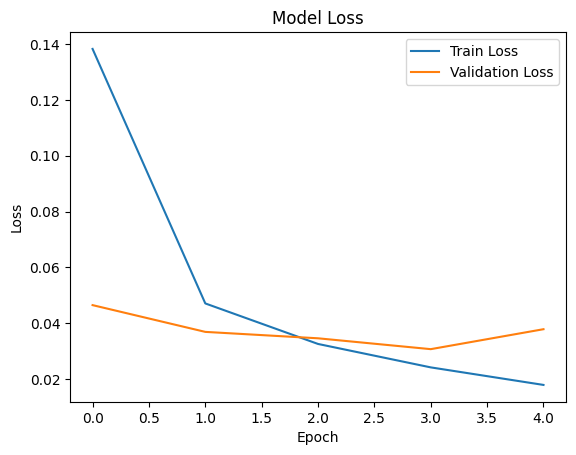

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Step 7: Evaluate and Save the **Model**

In [7]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Save the model
model.save("mnist_cnn_model.h5")
print("Model saved successfully as mnist_cnn_model.h5")


313/313 - 2s - 7ms/step - accuracy: 0.9893 - loss: 0.0378


Test accuracy: 0.9893
Test loss: 0.0378
Model saved successfully as mnist_cnn_model.h5


Step 8: Download Your Model

In [8]:
from google.colab import files
files.download('mnist_cnn_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Step 9: Prepare README

In [11]:
# Create README.md file with project description
readme_content = """
# Task 2 – Deep Learning Image Classification

## Description
This project implements a Convolutional Neural Network (CNN) using TensorFlow to classify handwritten digits from the MNIST dataset.

## Steps Performed
- Loaded and preprocessed MNIST dataset
- Normalized pixel values and reshaped images
- Built a CNN model:
  - 2 convolutional layers
  - Max pooling layers
  - Dense layers with ReLU and softmax
- Trained the model for 5 epochs
- Achieved ~98.9% accuracy on test data
- Visualized accuracy and loss over epochs
- Saved the trained model (`mnist_cnn_model.h5`)

## Tools Used
- Python
- TensorFlow
- Matplotlib

## Output
The trained model and visualizations are included.
"""

# Save to a markdown file
with open("README.md", "w") as file:
    file.write(readme_content)

print("README.md created successfully.")


README.md created successfully.
